#Importing Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

#Training Image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/archive (3)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 170 files belonging to 2 classes.


#Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/archive (3)/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 177 files belonging to 2 classes.


#Building Model

In [5]:

cnn = tf.keras.models.Sequential()

#Building Convolution Layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:

cnn.add(tf.keras.layers.Dropout(0.25))


In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:

cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))


In [12]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting


In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=2,activation='softmax'))


#Building Convolution Layer

In [15]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:

cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,620,450 (25.26 MB)

 Trainable params: 6,620,450 (25.26 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
6/6 ━━━━━━━━━━━━━━━━━━━━ 47s 8s/step - accuracy: 0.5146 - loss: 81.9316 - val_accuracy: 0.3842 - val_loss: 2.7019
Epoch 2/32
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5091 - loss: 3.6047 - val_accuracy: 0.3842 - val_loss: 0.6928
Epoch 3/32
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 706ms/step - accuracy: 0.5225 - loss: 0.6960 - val_accuracy: 0.6158 - val_loss: 0.6931
Epoch 4/32
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5309 - loss: 0.6926 - val_accuracy: 0.6158 - val_loss: 0.6905
Epoch 5/32
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 706ms/step - accuracy: 0.5794 - loss: 0.6850 - val_accuracy: 0.6158 - val_loss: 0.6865
Epoch 6/32
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5821 - loss: 0.6867 - val_accuracy: 0.6158 - val_loss: 0.6813
Epoch 7/32
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 705ms/step - accuracy: 0.5972 - loss: 0.6785 - val_accuracy: 0.6158 - val_loss: 0.6762
Epoch 8/32
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 698ms/step - accuracy: 0.5952 - loss: 0.6820 - val_accuracy: 0.6158 - val_loss: 0.6736
Ep

#Evaluating Model

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - accuracy: 0.5799 - loss: 0.6406
Training accuracy: 0.6000000238418579


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.5955 - loss: 0.6362
Validation accuracy: 0.6158192157745361


#Saving Model

In [20]:

cnn.save('keras_model.h5')

In [21]:

training_history.history #Return Dictionary of history

{'accuracy': [0.5176470875740051,
  0.5470588207244873,
  0.529411792755127,
  0.5588235259056091,
  0.6058823466300964,
  0.6000000238418579,
  0.6000000238418579,
  0.6000000238418579,
  0.6000000238418579,
  0.6000000238418579,
  0.6000000238418579,
  0.6235294342041016,
  0.5941176414489746,
  0.6411764621734619,
  0.7058823704719543,
  0.7058823704719543,
  0.6058823466300964,
  0.6000000238418579,
  0.6000000238418579,
  0.6000000238418579,
  0.6000000238418579,
  0.6000000238418579,
  0.5941176414489746,
  0.6000000238418579,
  0.6176470518112183,
  0.5764706134796143,
  0.6000000238418579,
  0.6000000238418579,
  0.6000000238418579,
  0.6000000238418579,
  0.6000000238418579,
  0.6000000238418579],
 'loss': [88.71752166748047,
  2.6734507083892822,
  0.6929376721382141,
  0.6911115646362305,
  0.6840277314186096,
  0.6832610368728638,
  0.6798452138900757,
  0.6790434718132019,
  0.6796337962150574,
  0.6687745451927185,
  0.677698016166687,
  0.6814842224121094,
  0.6685714125

In [22]:

#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


#Calculating Accuracy of Model Achieved on Validation set

In [24]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))


Validation set Accuracy: 61.58192157745361 %


#Accuracy Visualization

#Training Visualization


In [25]:
#training_history.history['accuracy']

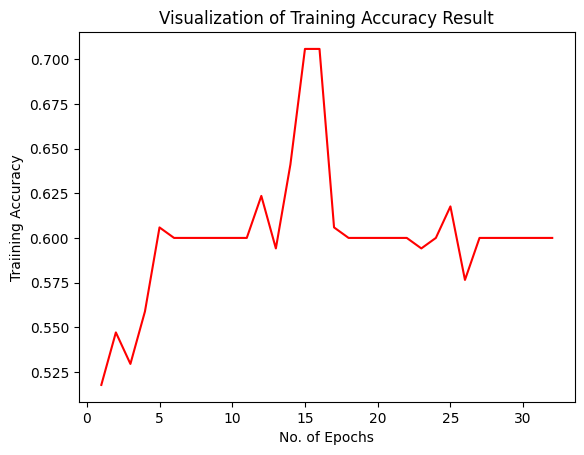

In [26]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

#Validation Accuracy

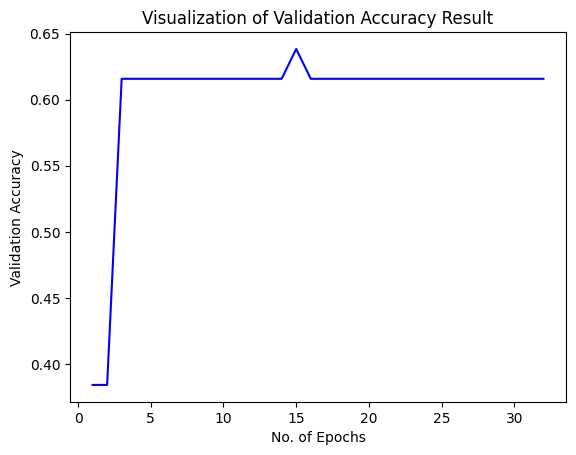

In [27]:

plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

#Test set Evaluation

In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/archive (3)/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 170 files belonging to 2 classes.


In [29]:


test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.6020 - loss: 0.6308
Test accuracy: 0.6000000238418579
